In [1]:
import psycopg2
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from collections import Counter
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df1 = pd.read_csv('df1.csv')
df1

,abone_durumu,age,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_white-collar,marital_married,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success
0,0,58,0,2143,1,0,5,5,261,1,...,0,1,1,0,1,0,0,1,0,0
1,0,44,0,29,1,0,5,5,151,1,...,0,0,0,1,0,0,0,1,0,0
2,0,33,0,2,1,1,5,5,76,1,...,0,1,1,1,0,0,0,1,0,0
3,0,47,0,1506,1,0,5,5,92,1,...,0,0,1,0,0,1,0,1,0,0
4,0,35,0,231,1,0,5,5,139,1,...,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44918,1,51,0,825,0,0,17,11,977,3,...,0,0,1,0,1,0,0,0,0,0
44919,1,71,0,1729,0,0,17,11,456,2,...,0,0,0,0,0,0,0,0,0,0
44920,1,72,0,5715,0,0,17,11,1127,5,...,0,0,1,1,0,0,0,0,0,1
44921,0,57,0,668,0,0,17,11,508,4,...,0,0,1,1,0,0,1,0,0,0


In [3]:
## DENGESİZ VERİ KÜMELERİ DENGELEME İŞLEMLERİ - OVER-UNDER SAMPLİNG

In [4]:
#oversampling yaparak bir model oluşturup ardından dengeli olmayan yukarıdaki gibi bir modelle karşılaştıracağız. 

In [5]:
#Yetimedik bir de confusion matrix değerlerini de inceleyecğiz. 

def print_confusion_matrix(confusion_matrix, class_names, figsize = [12,8], fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to [12,8].
    fontsize: int
        Font size for axes labels. Defaults to 18.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [6]:
#Veri setimizi kopyaladık ve ismini değiştirdik.
imbalanced_df=df1.copy()
imbalanced_df.head()

,abone_durumu,age,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_white-collar,marital_married,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success
0,0,58,0,2143,1,0,5,5,261,1,...,0,1,1,0,1,0,0,1,0,0
1,0,44,0,29,1,0,5,5,151,1,...,0,0,0,1,0,0,0,1,0,0
2,0,33,0,2,1,1,5,5,76,1,...,0,1,1,1,0,0,0,1,0,0
3,0,47,0,1506,1,0,5,5,92,1,...,0,0,1,0,0,1,0,1,0,0
4,0,35,0,231,1,0,5,5,139,1,...,0,1,1,0,1,0,0,1,0,0


In [7]:
#tekrar dengesine baktık fazladan işlemler
target_count = imbalanced_df.abone_durumu.value_counts(normalize=True)
target_count

abone_durumu
0    0.883022
1    0.116978
Name: proportion, dtype: float64

In [8]:
#veri setimizin yüzdelik dağılımına tekrar baktık. 
imbalanced_df.abone_durumu.value_counts()

abone_durumu
0    39668
1     5255
Name: count, dtype: int64

In [9]:
# stratify=y parametresi veri setini bölme aşamasında train ve testteki label dağılımının dengeli olacağını söyler
X = imbalanced_df.iloc[:, 1:]
y = imbalanced_df.abone_durumu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
#RF ile tekrar eğittik. 
rf = RandomForestClassifier()

rf.fit( X_train, y_train)

RandomForestClassifier()

In [11]:
#bu henüz dengesizlik giderilmemiş durum.
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 3)}')

Model Accuracy: 0.905


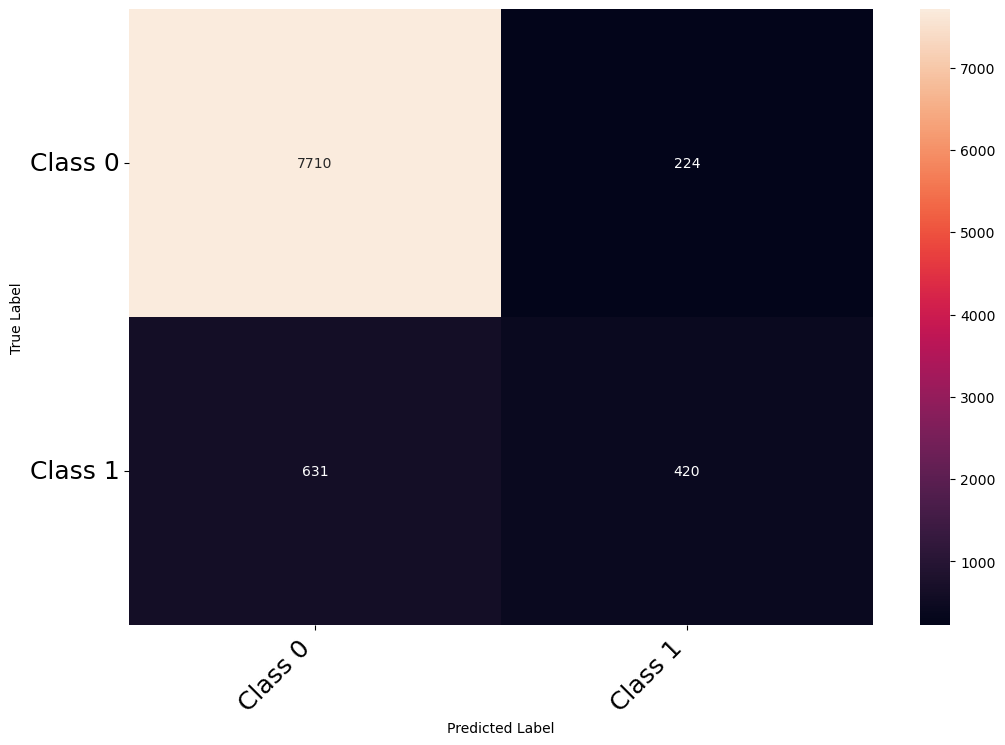

In [12]:
#Gerçekte O sınıfının 7718 tanesini doğru tahmin 216 adedini yanlış tahmin etmiş. 
#Gerçekte 1 sınıfının  629 tanesini yanlış tahmin etmiş, 422 adedini doğru tahmin etmiş. 
#Dengesizliğin modelimizin başarısını etkilediğini görebiliyoruz o yüzden düzeltme işlemlerine geçeceğiz. 
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [13]:
## RANDOM FOREST ALGORİTMASI 

In [14]:
#Random Oversampling uyguluyoruz kopyalama 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [15]:
# Artık elimizde dengeli bir sınıf dağılımı var :)
Counter(y_resampled)

Counter({0: 31734, 1: 31734})

In [16]:
#Random Oversampling uygulanan modeli Random Forest algoritması ile tekrar eğitiyoruz
rf_ros = rf.fit( X_resampled, y_resampled)

acc1_rf = cross_val_score(rf_ros, X_resampled, y_resampled, cv=5, scoring='accuracy')
acc1_rf

array([0.97266425, 0.96982827, 0.96967071, 0.97132278, 0.97124399])

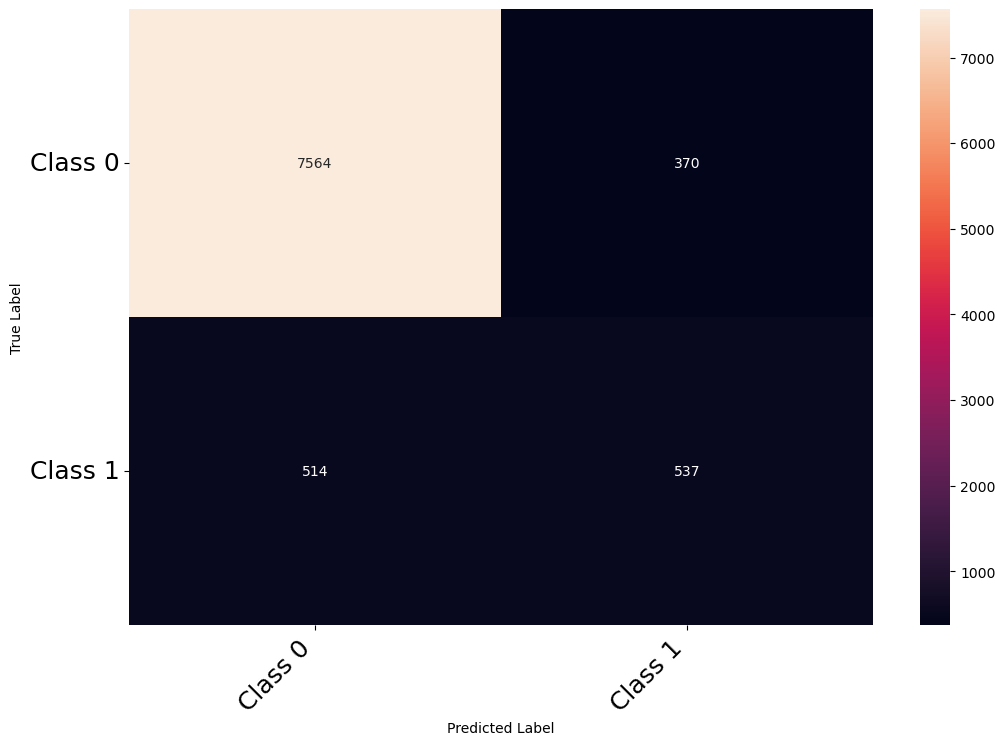

In [17]:
# RO uygulanmış hata matrisi / RO öncesine göre biraz daha iyi.
print_confusion_matrix(confusion_matrix(y_test, rf_ros.predict(X_test)), ['Class 0', 'Class 1'])

In [18]:
#SMOTE Oversampling ile örnekler oluşturacağız. 
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE().fit_resample(X_train, y_train)

In [19]:
Counter(y_smoted)

Counter({0: 31734, 1: 31734})

In [20]:
#SMOTE Oversampling uygulanan modeli Random Forest algoritması ile tekrar eğitiyoruz
rf_smote = rf.fit( X_smoted, y_smoted)
acc2_rf = cross_val_score(rf_smote, X_smoted, y_smoted, cv=5, scoring='accuracy')
acc2_rf

array([0.80100835, 0.94816449, 0.95060659, 0.95170566, 0.95005121])

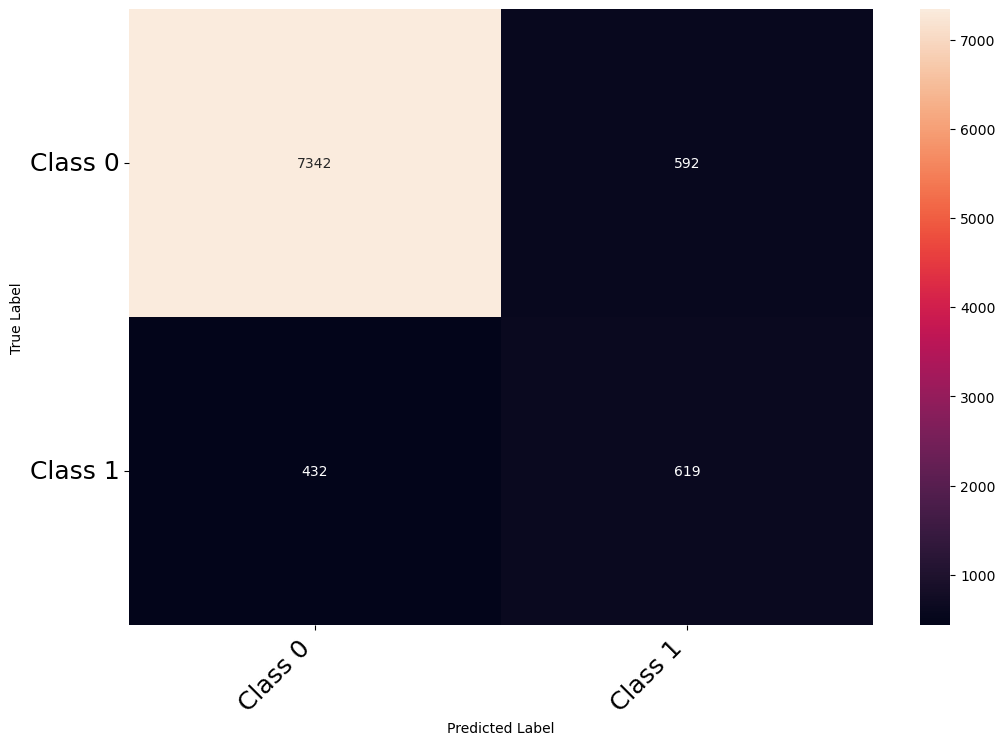

In [21]:
# SMOTE uygulanmış hata matrisi / RO'ya göre biraz daha iyi.
print_confusion_matrix(confusion_matrix(y_test, rf_smote.predict(X_test)), ['Class 0', 'Class 1'])

In [22]:
#ADASYN Oversampling ile örnekler oluşturacağız özellikle sınır bölgelerinde. 
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN().fit_resample(X_train, y_train)

In [23]:
Counter(y_adasyn)

Counter({1: 32824, 0: 31734})

In [24]:
#ADASYN Oversampling uygulanan modeli Random Forest algoritması ile tekrar eğitiyoruz
rf_adasyn = rf.fit(X_adasyn, y_adasyn)
acc3_rf = cross_val_score(rf_adasyn, X_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc3_rf

array([0.79670074, 0.943386  , 0.93951363, 0.94779645, 0.94237472])

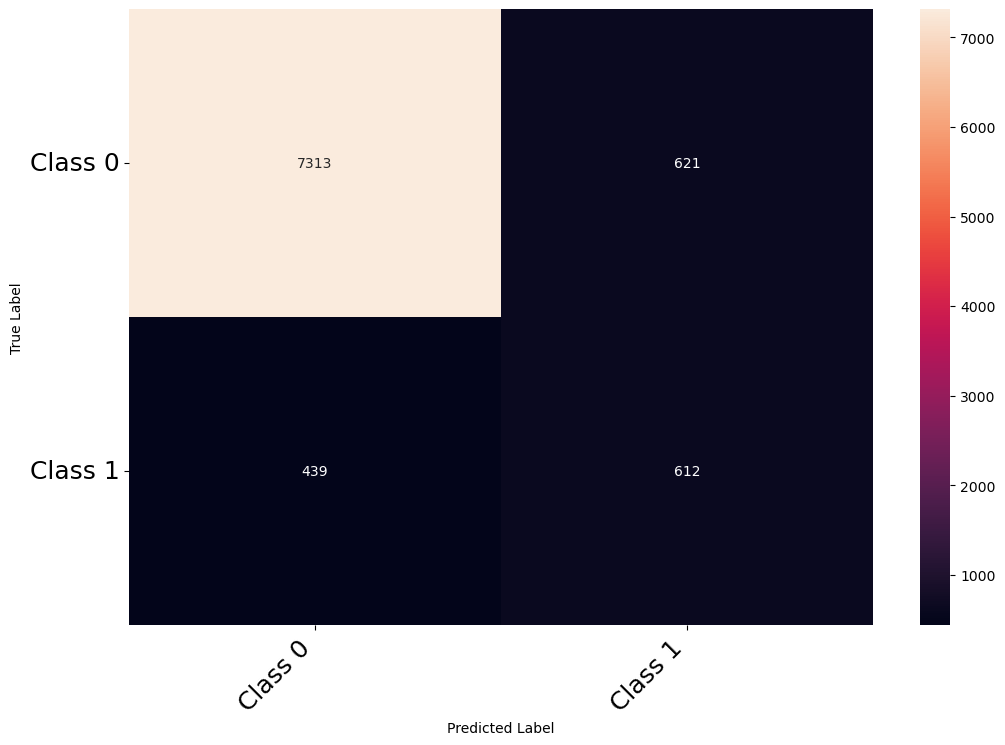

In [25]:
#ADASYN uygulanmış hata matrisi / SMOTE'a göre biraz daha iyi. Class O biraz değer kaybetmiş ama Class 1 621'e çıkmış.
print_confusion_matrix(confusion_matrix(y_test, rf_adasyn.predict(X_test)), ['Class 0', 'Class 1'])

In [26]:
#BORDERLINE (smote+adasyn) Oversampling ile örnekler oluşturacağız özellikle sınır bölgelerinde.
from imblearn.over_sampling import BorderlineSMOTE
X_blsmote, y_blsmote = BorderlineSMOTE().fit_resample(X_train, y_train)

In [27]:
Counter(y_blsmote)

Counter({0: 31734, 1: 31734})

In [28]:
#BORDERLINE Oversampling uygulanan modeli Random Forest algoritması ile tekrar eğitiyoruz
rf_blsmote = rf.fit(X_blsmote, y_blsmote)
acc4_rf = cross_val_score(rf_blsmote, X_blsmote, y_blsmote, cv=5, scoring='accuracy')
acc4_rf

array([0.79265795, 0.95549078, 0.95525445, 0.95745687, 0.95745687])

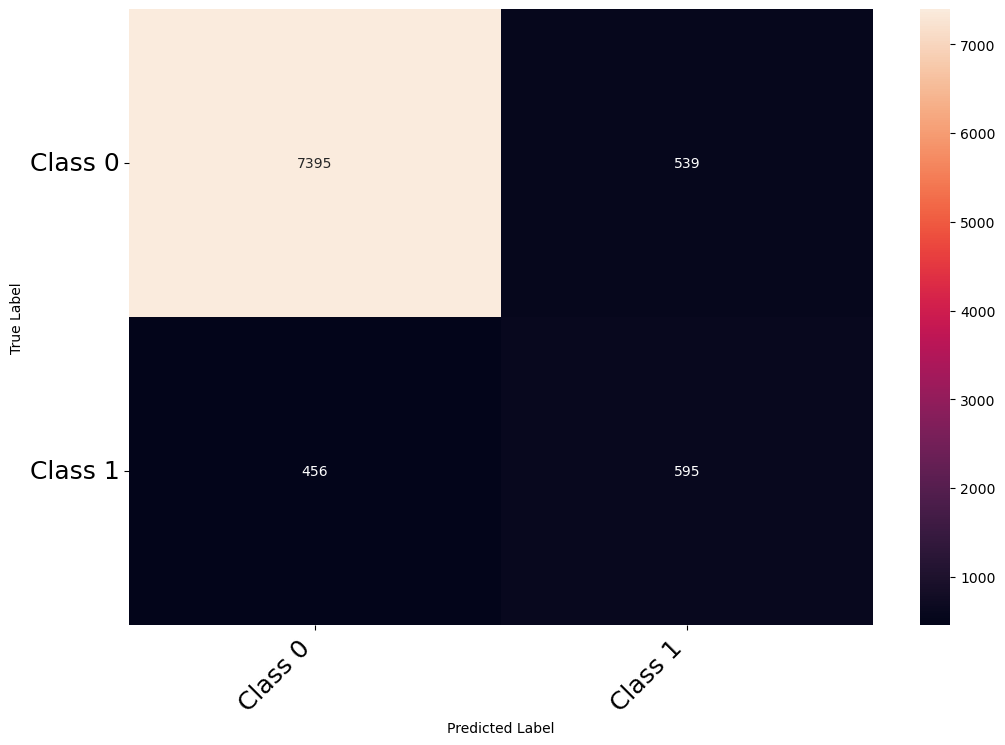

In [29]:
#Belli ki bunu tercih etmeyeceğiz. 
print_confusion_matrix(confusion_matrix(y_test, rf_blsmote.predict(X_test)), ['Class 0', 'Class 1'])

In [30]:
#Veri setini dengelemek için Random Forest algaritması ile uyguladığımız Oversampling 4 farklı sonucunun metriklerini döndürür
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

def evaluate_model_performance(model, X, y):
    # Modelin accuracy, precision, recall, f1-score ve AUC değerlerini hesaplayarak döndürür
    accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=5, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=5, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1').mean()
    auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean()
    
    return accuracy, precision, recall, f1, auc

# Modellerin performansını değerlendirme
acc1_rf, prec1_rf, recall1_rf, f1_rf, auc1_rf = evaluate_model_performance(rf_ros, X_resampled, y_resampled)
acc2_rf, prec2_rf, recall2_rf, f1_2_rf, auc2_rf = evaluate_model_performance(rf_smote, X_smoted, y_smoted)
acc3_rf, prec3_rf, recall3_rf, f1_3_rf, auc3_rf = evaluate_model_performance(rf_adasyn, X_adasyn, y_adasyn)
acc4_rf, prec4_rf, recall4_rf, f1_4_rf, auc4_rf = evaluate_model_performance(rf_blsmote, X_blsmote, y_blsmote)

# Sonuçları yazdırma
print("Random Forest with RandomOverSampler:")
print("Accuracy:", acc1_rf)
print("Precision:", prec1_rf)
print("Recall:", recall1_rf)
print("F1 Score:", f1_rf)
print("AUC Score:", auc1_rf)

print("\nRandom Forest with SMOTE:")
print("Accuracy:", acc2_rf)
print("Precision:", prec2_rf)
print("Recall:", recall2_rf)
print("F1 Score:", f1_2_rf)
print("AUC Score:", auc2_rf)

print("\nRandom Forest with ADASYN:")
print("Accuracy:", acc3_rf)
print("Precision:", prec3_rf)
print("Recall:", recall3_rf)
print("F1 Score:", f1_3_rf)
print("AUC Score:", auc3_rf)

print("\nRandom Forest with BorderlineSMOTE:")
print("Accuracy:", acc4_rf)
print("Precision:", prec4_rf)
print("Recall:", recall4_rf)
print("F1 Score:", f1_4_rf)
print("AUC Score:", auc4_rf)

Random Forest with RandomOverSampler:
Accuracy: 0.9710090036836133
Precision: 0.9447710880233183
Recall: 0.9996218685993383
F1 Score: 0.9717616388059943
AUC Score: 0.9998723389460595

Random Forest with SMOTE:
Accuracy: 0.9205751273443438
Precision: 0.9247067800474411
Recall: 0.9175038113800014
F1 Score: 0.9151215582867327
AUC Score: 0.9832289266338048

Random Forest with ADASYN:
Accuracy: 0.9139698077880816
Precision: 0.9240427308689917
Recall: 0.9050106537865149
F1 Score: 0.9083080610815004
AUC Score: 0.9787972452645064

Random Forest with BorderlineSMOTE:
Accuracy: 0.9235688475841313
Precision: 0.928561084447131
Recall: 0.9191426290569791
F1 Score: 0.9164628977522529
AUC Score: 0.9839923141866427


In [31]:
results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Cross Validated Score (Mean)': [acc3_rf.mean()],
    'Cross Validated Score (Std)': [acc3_rf.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,91.4,0.0


In [32]:
results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Cross Validated Score (Mean)': [acc2_rf.mean()],
    'Cross Validated Score (Std)': [acc2_rf.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,92.06,0.0


In [33]:
## UNDERSAMPLING

In [34]:
#Bir tane de Undersampling yapalım
from imblearn.under_sampling import RandomUnderSampler 
X_under, y_under = RandomUnderSampler().fit_resample(X_train, y_train)

In [35]:
Counter(y_under)

Counter({0: 4204, 1: 4204})

In [36]:
#Undersampling uygulanan modeli Random Forest algoritması ile tekrar eğitiyoruz
rf_rus = rf.fit(X_under, y_under)
acc5_rf = cross_val_score(rf_rus, X_under, y_under, cv=5, scoring='accuracy')
acc5_rf

array([0.843044  , 0.85077289, 0.85374554, 0.85306365, 0.84592504])

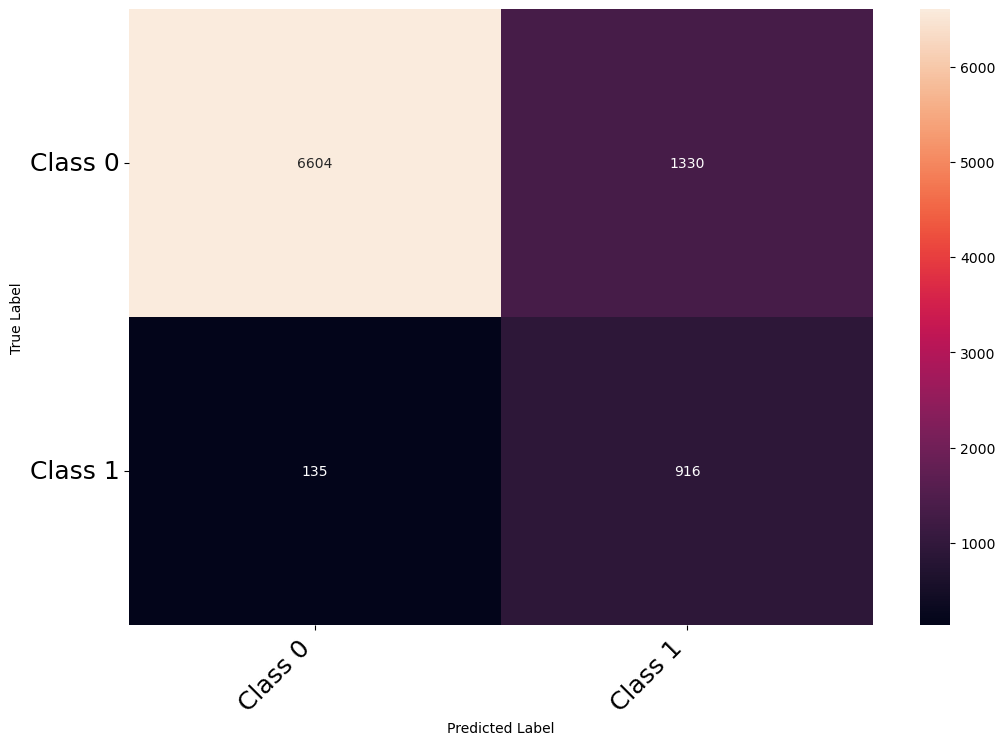

In [37]:
print_confusion_matrix(confusion_matrix(y_test, rf_rus.predict(X_test)), ['Class 0', 'Class 1'])

In [38]:
# Performansı değerlendirme
acc5_rf, prec5_rf, recall5_rf, f1_5_rf, auc5_rf = evaluate_model_performance(rf_rus, X_under, y_under)

# Sonuçları yazdırma
print("\nRandom Forest with RandomUnderSampler:")
print("Accuracy:", acc5_rf)
print("Precision:", prec5_rf)
print("Recall:", recall5_rf)
print("F1 Score:", f1_5_rf)
print("AUC Score:", auc5_rf)


Random Forest with RandomUnderSampler:
Accuracy: 0.8501431329095345
Precision: 0.8270084427881244
Recall: 0.8765440801766605
F1 Score: 0.8509976611878363
AUC Score: 0.9183932037923096


In [39]:
## DENGELENMİŞ VERİ KÜMEMİZİ TEKRAR ALGORİTMALARLA EĞİTİYORUZ. 
##CROSS VALİDASYON YAPILIP EN DOĞRU MODEL SEÇİMİ GERÇEKLEŞTİRİLECEK

In [40]:
results = pd.DataFrame({
    'Model': ['Random Forest'],
    'Cross Validated Score (Mean)': [acc5_rf.mean()],
    'Cross Validated Score (Std)': [acc5_rf.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Random Forest,85.01,0.0


In [41]:
def evaluate_model(model, X, y, pred_label=1):

    """
    This function evaluates your model and interprets the classification metrics results in a DataFrame format.
    
    Input
    ---------
    model: Classification Model
    X: Features
    y: Label
    pred_label: Which label will be used for interprets the results
        
    Output
    -------
    metric_df: Result DataFrame
    """
    
    y_pred = model.predict(X)

    accuracy = round(accuracy_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred, pos_label = pred_label), 3)
    precision = round(precision_score(y, y_pred, pos_label = pred_label), 3)
    f1 = round(f1_score(y, y_pred, pos_label = pred_label), 3)
    auc_score = round(roc_auc_score(y, y_pred), 3)

    metric_df = pd.DataFrame([accuracy, recall, precision, f1, auc_score]).T
    metric_df.index = ["Class " + str(pred_label)]
    metric_df.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

    return metric_df
    

In [42]:
#Undersampling Uygulanan Modelde Baktık
evaluate_model(rf_rus, X_test, y_test, pred_label=0)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 0,0.837,0.832,0.98,0.9,0.852


In [43]:
#Undersampling Uygulanan Modelde Baktık
evaluate_model(rf_rus, X_test, y_test, pred_label=1)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 1,0.837,0.872,0.408,0.556,0.852


In [44]:
#Oversampling Uygulanan Modelde Baktık
evaluate_model(rf_adasyn, X_test, y_test, pred_label=0)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 0,0.837,0.832,0.98,0.9,0.852


In [45]:
#Undersampling Uygulanan Modelde Baktık
evaluate_model(rf_adasyn, X_test, y_test, pred_label=1)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 1,0.837,0.872,0.408,0.556,0.852


In [46]:
## ARTIK HANGİ MODELİ KULLANACAĞIMIZA KARAR VERMELİYİZ. 

In [47]:
#ADASYN Oversampling uygulanan modeli Random Forest algoritması ile tekrar eğitiyoruz
rf_adasyn = rf.fit(X_adasyn, y_adasyn)
acc3_rf = cross_val_score(rf_adasyn, X_adasyn, y_adasyn, cv=5, scoring='accuracy')
acc3_rf

array([0.7966233 , 0.94152726, 0.93873916, 0.94601503, 0.94330416])

In [48]:
# X_under ve y_under veri setlerini birleştirme
imbalanced_df = pd.DataFrame(X_adasyn, columns=X.columns)  # Özellikler
imbalanced_df['abone_durumu'] = y_adasyn  # Hedef sınıflar
abone_durumu_column = imbalanced_df.pop('abone_durumu')  # "abone_durumu" sütununu çıkarır
imbalanced_df.insert(0, 'abone_durumu', abone_durumu_column)  # "abone_durumu" sütununu en başa ekler

# Oluşturulan veri çerçevesini görüntüleme (isteğe bağlı
imbalanced_df.head()

,abone_durumu,age,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_white-collar,marital_married,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success
0,0,55,0,3293,0,0,30,7,64,2,...,0,1,1,0,0,0,1,0,0,0
1,1,24,0,167,0,1,18,2,134,2,...,0,0,0,1,0,0,0,0,0,0
2,0,50,0,0,0,0,13,8,114,2,...,0,0,0,1,0,0,0,0,0,0
3,1,59,0,3444,0,0,6,2,241,2,...,0,0,0,0,1,0,0,0,0,0
4,1,28,0,707,1,0,25,5,226,1,...,0,0,0,1,0,0,0,0,0,0


In [49]:
#veri setimizin yüzdelik dağılımına tekrar baktık. 
imbalanced_df.abone_durumu.value_counts()

abone_durumu
1    32824
0    31734
Name: count, dtype: int64

In [50]:
# stratify=y parametresi veri setini bölme aşamasında train ve testteki label dağılımının dengeli olacağını söyler
X = imbalanced_df.iloc[:, 1:]
y = imbalanced_df.abone_durumu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [51]:
#RF ile tekrar eğittik. 
rf = RandomForestClassifier()

rf.fit( X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {round(accuracy, 3)}')

Model Accuracy: 0.934


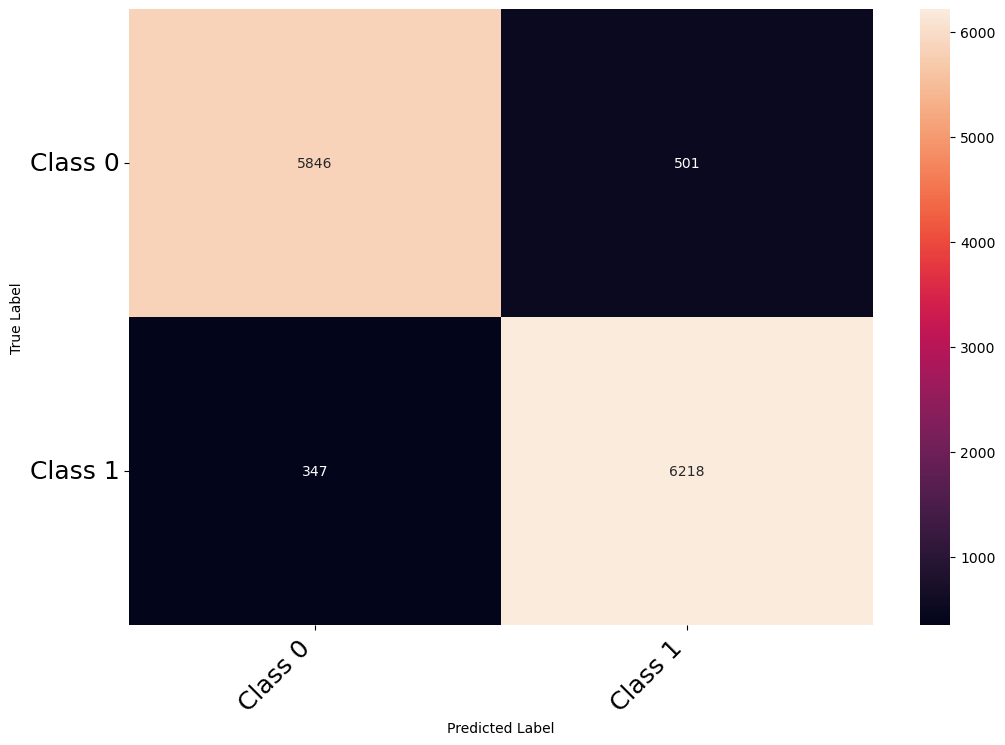

In [53]:
#Gerçekte O sınıfının 7718 tanesini doğru tahmin 216 adedini yanlış tahmin etmiş. 
#Gerçekte 1 sınıfının  629 tanesini yanlış tahmin etmiş, 422 adedini doğru tahmin etmiş. 
#Dengesizliğin modelimizin başarısını etkilediğini görebiliyoruz o yüzden düzeltme işlemlerine geçeceğiz. 
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [54]:
importances_rf = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(rf.feature_importances_,3)})
importances_rf = importances_rf.sort_values('Importance', ascending=False).set_index('Feature')
importances_rf

,Importance
Feature,
duration,0.255
housing,0.117
contact_unknown,0.083
month,0.072
balance,0.069
day,0.059
age,0.052
marital_married,0.043
education_secondary,0.042


In [55]:
#RF ile tekrar eğittik. Modeli Oluşturduk.
lm1 = RandomForestClassifier()

lm1.fit( X_train[['duration']].values, y_train)

RandomForestClassifier()

In [56]:
print("Training Accuracy:", round(lm1.score(X_train[['duration']].values, y_train), 3))
print("Testing Accuracy:", round(lm1.score(X_test[['duration']].values, y_test), 3))

Training Accuracy: 0.704
Testing Accuracy: 0.685


In [66]:
lm1.predict([[76],[456],[508],[977],[1127]])

array([0, 1, 1, 1, 1], dtype=int64)

In [67]:
lm1.predict_proba([[76],[456],[508],[977],[1127]]) 

array([[0.91520791, 0.08479209],
       [0.36147196, 0.63852804],
       [0.3705631 , 0.6294369 ],
       [0.1137455 , 0.8862545 ],
       [0.        , 1.        ]])

In [88]:
lm1.predict([[209],[456]])

array([1, 1], dtype=int64)

In [89]:
lm1.predict_proba([[209],[456]]) 

array([[0.49010811, 0.50989189],
       [0.36147196, 0.63852804]])

In [57]:
feature = X_train[['duration']].values # Eğitimde kullandığım özellikler
prediction_train = lm1.predict(feature) # Bu özellikleri input olarak kullanarak tahmin gerçekleştirme

In [58]:
prediction_test = lm1.predict(X_test[['duration']].values)

In [59]:
confusion_matrix(y_train, prediction_train) # Eğitim veri setimize ait hata matrisi

array([[16428,  8959],
       [ 6333, 19926]], dtype=int64)

In [60]:
confusion_matrix(y_test, prediction_test) # Test veri setimize ait hata matrisi

array([[3975, 2372],
       [1696, 4869]], dtype=int64)

In [61]:
duration = 241

example_df = pd.DataFrame({
    'duration': [duration],
})
example_df

,duration
0,241


In [62]:
#son görüşme süresi 152 olduğunda O'ınca sınıfa ait olduğunu gözlemledik.
lm1.predict(example_df)

C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1], dtype=int64)

In [63]:
#0'ıncı sınıfın tahmin olasılığı %71 
lm1.predict_proba(example_df)

C:\Users\BETUL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[0.4725018, 0.5274982]])

In [90]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(lm1, 'rf_model.pkl')

['rf_model.pkl']

NameError: name 'train_df' is not defined